# Building Neural Networks 3 different ways with different levels of customization

## Setup

In [41]:
import os
if os.getcwd().endswith("notebooks"):
    os.chdir('..')

print("Current working directory: ", os.getcwd())
if not os.getcwd().endswith("FashionMNIST-NN-Optimization"):
    raise ValueError("Please change working directory to 'path/FashionMNIST-NN-Optimization' before proceeding")

Current working directory:  /Users/irellzane/MLprojects/FashionMNIST-NN-Optimization


In [42]:
!pip install -r requirements.txt

In [43]:
import zipfile
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

## Fetch data

In [44]:
with zipfile.ZipFile("data/fashion_mnist_data.zip", 'r') as zip_ref:
    zip_ref.extractall("data/")

In [45]:
fmnist_train = pd.read_csv("data/fashion_mnist_train.csv")
fmnist_test = pd.read_csv("data/fashion_mnist_test.csv")

## Separating labels and data splitting

In [46]:
fmnist_train.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,5,0,...,0,0,0,30,43,0,0,0,0,0
3,0,0,0,0,1,2,0,0,0,0,...,3,0,0,0,0,1,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
fmnist_train.notnull().any(axis=1).value_counts()

True    60000
Name: count, dtype: int64

In [49]:
y_train_valid = fmnist_train["label"]
X_train_valid = fmnist_train.drop("label", axis=1)
y_test = fmnist_test["label"]
X_test = fmnist_test.drop("label", axis=1)

In [51]:
len(X_train_valid)

60000

In [83]:
from sklearn.model_selection import train_test_split

X_train, X_valid, y_train, y_valid = train_test_split(X_train_valid, y_train_valid, test_size=1/12, stratify=y_train_valid)

In [84]:
len(X_train), len(X_valid)

(55000, 5000)

In [85]:
y_train.value_counts()

label
9    5500
8    5500
0    5500
3    5500
6    5500
1    5500
4    5500
5    5500
2    5500
7    5500
Name: count, dtype: int64

In [88]:
fmnist_train

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,5,0,...,0,0,0,30,43,0,0,0,0,0
3,0,0,0,0,1,2,0,0,0,0,...,3,0,0,0,0,1,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59995,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59996,1,0,0,0,0,0,0,0,0,0,...,73,0,0,0,0,0,0,0,0,0
59997,8,0,0,0,0,0,0,0,0,0,...,160,162,163,135,94,0,0,0,0,0
59998,8,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [108]:
labels = np.array(["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat", "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"])

## Dataset analysis

In [118]:
X_train.shape

(55000, 784)

In [119]:
img_len = int(np.sqrt(X_train.shape[1]))

TypeError: 'numpy.float64' object cannot be interpreted as an integer

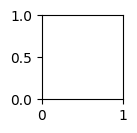

In [120]:
n_rows = 2
n_cols = 4
plt.figure(figsize=(n_cols * 1.2, n_rows * 1.2))
for row in range(n_rows):
    for col in range(n_cols):
        index = n_cols * row + col
        plt.subplot(n_rows, n_cols, index + 1)
        image = X_train.iloc[index].to_numpy().reshape(img_len, img_len)
        plt.imshow(image, cmap="Greys")
        plt.axis('off')
        plt.title(labels[y_train[index]])
plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show()